In [12]:
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from matplotlib import  pyplot as plt
import  seaborn as sns
from sklearn.cluster import  KMeans
import numpy as np
import  pandas as pd
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.base import ClusterMixin
from sklearn.utils.extmath import row_norms
import  warnings

warnings.filterwarnings("ignore")

In [13]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess data
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X = np.concatenate((X_train, X_test),axis=0)
y = np.concatenate((y_train, y_test))



* Sklearn  Libary not supported manhattan and cosine distance so i inherit from Kmeans and rewrite to _compute_distances() function*

In [14]:
# Define a custom KMeans estimator to support custom distance metrics
class CustomKMeans(KMeans, ClusterMixin):
    def __init__(self, n_clusters=8, *, distance_metric='euclidean', **kwargs):
        self.distance_metric = distance_metric
        super().__init__(n_clusters=n_clusters, **kwargs)

    def _check_fit_data(self, X):
        X = self._validate_data(X, dtype=[np.float64, np.float32],
                                order='C', accept_sparse='csr')
        n_samples, n_features = X.shape
        if n_samples < self.n_clusters:
            raise ValueError(f"n_samples={n_samples} should be >= n_clusters={self.n_clusters}.")
        return X

    def _transform(self, X):
        if self.distance_metric == 'euclidean':
            return super()._transform(X)
        elif self.distance_metric == 'manhattan':
            centers = self.cluster_centers_
            return row_norms(X - centers[np.argmin(pairwise_distances_argmin_min(X, centers, metric='manhattan')[0])], squared=True)
        elif self.distance_metric == 'cosine':
            centers_norms = row_norms(self.cluster_centers_, squared=True)
            return 1 - np.dot(X, self.cluster_centers_.T) / np.sqrt(np.outer(row_norms(X, squared=True), centers_norms))

In [15]:
def kmeans_clustering(X, distance_metric,n_clusters):
    if distance_metric == 'euclidean':
        kmeans = CustomKMeans(n_clusters=n_clusters, random_state=0)
    elif distance_metric == 'manhattan':
        kmeans = CustomKMeans(n_clusters=n_clusters, random_state=0, distance_metric='manhattan')
    elif distance_metric == 'cosine':
        kmeans = CustomKMeans(n_clusters=n_clusters, random_state=0,  distance_metric='cosine')


    return kmeans.fit(X)

Using Euclidean distance metric:
 #########  KFold Step: 1   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0     3.0     5.0  4002.0     2.0  1108.0   232.0   123.0     5.0    47.0   
1  2781.0     9.0     0.0  3455.0     5.0     4.0     7.0     6.0     6.0   
2   342.0  3931.0    47.0   349.0   182.0   243.0   106.0    62.0   174.0   
3    47.0   163.0    19.0   365.0   411.0  3630.0    25.0    38.0   869.0   
4   220.0    21.0     6.0   161.0   172.0     0.0   138.0  1804.0    14.0   
5   289.0     4.0    44.0   134.0  1403.0  1682.0    59.0   188.0   887.0   
6    39.0    41.0    56.0   174.0  1623.0    29.0  3454.0     3.0    12.0   
7   256.0    46.0    17.0   328.0     7.0     4.0     2.0  3477.0    20.0   
8   281.0    40.0    26.0   276.0   224.0   956.0    41.0   162.0  3299.0   
9    74.0    17.0    37.0   220.0    23.0    76.0    11.0  2272.0    70.0   

       C9  
0    33.0  
1     4.0  
2   174.0  
3   141.0  
4  2993.0  
5

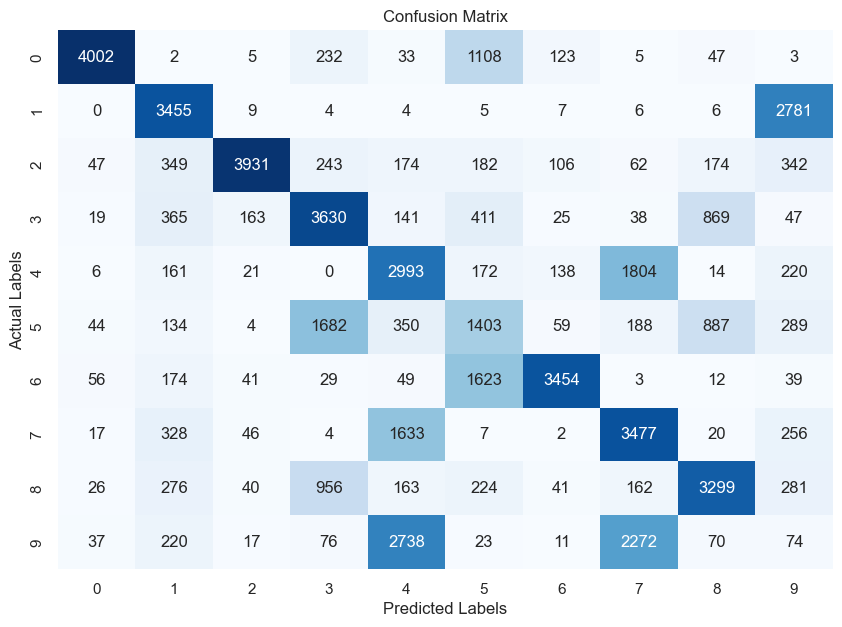

Training Accuray:  0.5306785714285714
***************************************************************************
Test Confusing Matrix


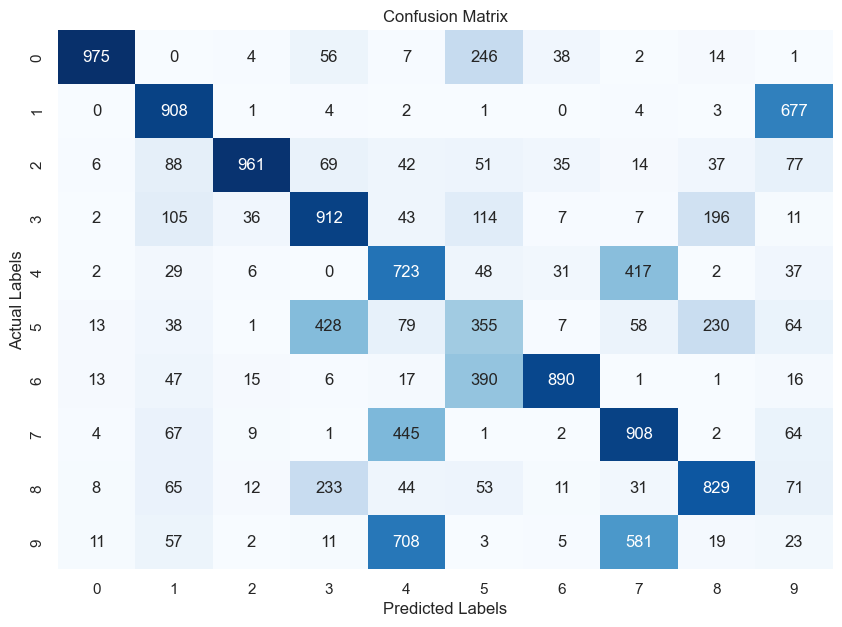

TestAccuray:  0.5345714285714286
***************************************************************************
 #########  KFold Step: 2   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0  4031.0     2.0     7.0   138.0    31.0   971.0   227.0     4.0    49.0   
1     0.0  3408.0     7.0     5.0     6.0     6.0     7.0  2863.0     6.0   
2    40.0   337.0  3887.0   116.0   176.0   180.0   263.0   334.0   169.0   
3    13.0   364.0   157.0    23.0   165.0   413.0  3752.0    41.0   784.0   
4     7.0   139.0    21.0   144.0  3022.0   212.0     0.0   179.0    15.0   
5    47.0   122.0     5.0    58.0   369.0  1498.0  1713.0   202.0   857.0   
6    59.0   163.0    42.0  3553.0    56.0  1549.0    32.0    35.0    13.0   
7    15.0   290.0    39.0     4.0  1687.0    10.0     6.0   244.0    13.0   
8    29.0   273.0    39.0    38.0   175.0   265.0   961.0   253.0  3338.0   
9    37.0   221.0    12.0    15.0  2759.0    26.0    78.0    75.0    67.0  

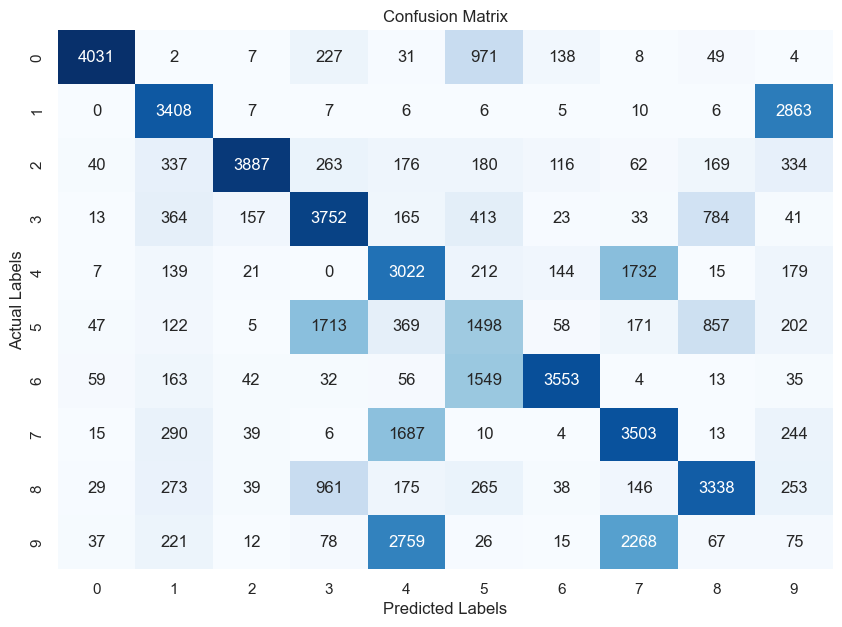

Training Accuray:  0.5369107142857142
***************************************************************************
Test Confusing Matrix


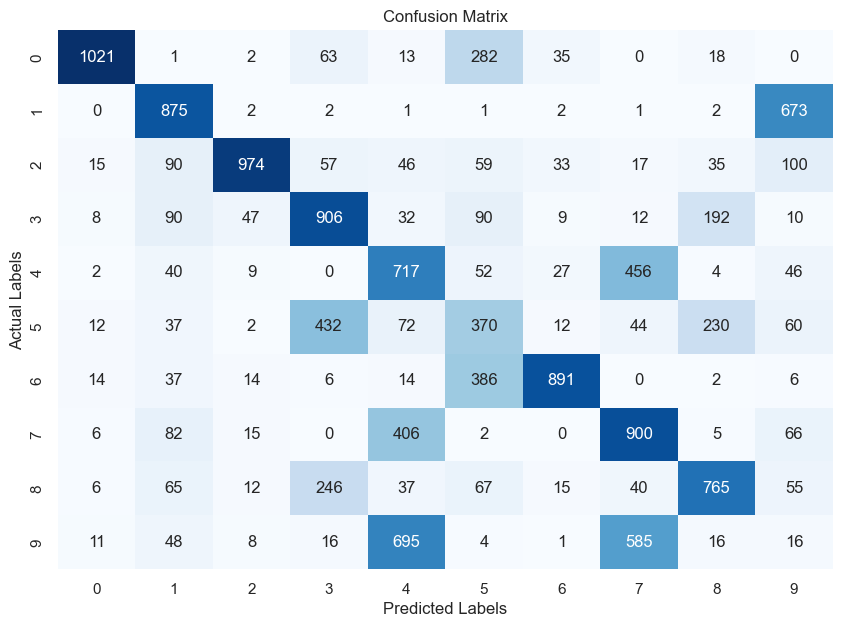

TestAccuray:  0.5310714285714285
***************************************************************************
 #########  KFold Step: 3   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0   141.0    81.0     1.0    29.0   989.0     3.0  4035.0     6.0     7.0   
1     2.0     8.0  3464.0     5.0     5.0  2820.0     0.0    11.0     5.0   
2   124.0   155.0   334.0   157.0   234.0   340.0    49.0    66.0  3897.0   
3    26.0   897.0   362.0   156.0   377.0    44.0    16.0    37.0   170.0   
4   131.0    11.0   140.0  2975.0   272.0   171.0     8.0  1732.0    24.0   
5    54.0   997.0   135.0   309.0  1474.0   165.0    46.0   171.0     5.0   
6  3525.0    19.0   159.0    52.0  1509.0    30.0    69.0     4.0    47.0   
7     4.0    14.0   268.0  1650.0    12.0   241.0    19.0  3571.0    46.0   
8    41.0  3262.0   278.0   170.0   326.0   214.0    28.0   149.0    46.0   
9    11.0    74.0   196.0  2782.0    30.0    76.0    39.0  2295.0    14.0  

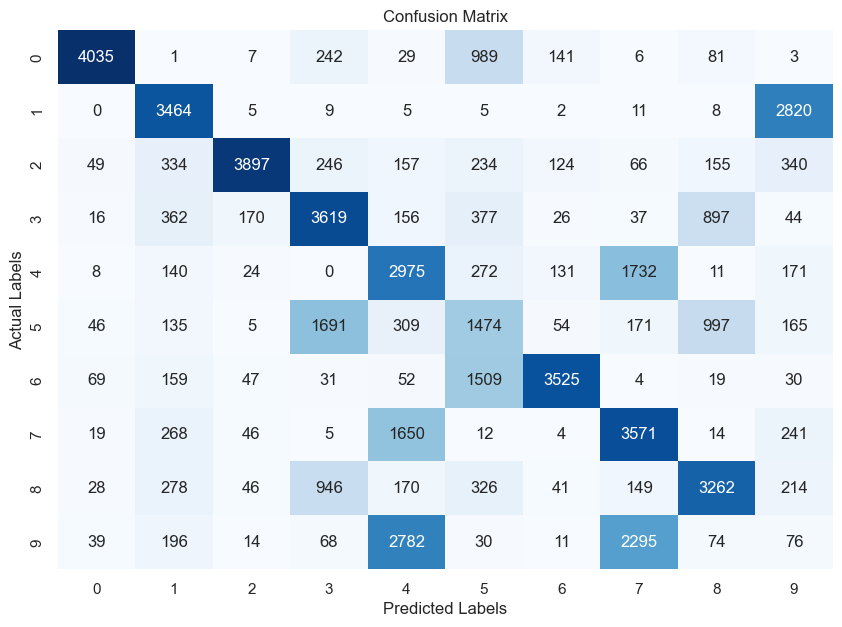

Training Accuray:  0.5338928571428572
***************************************************************************
Test Confusing Matrix


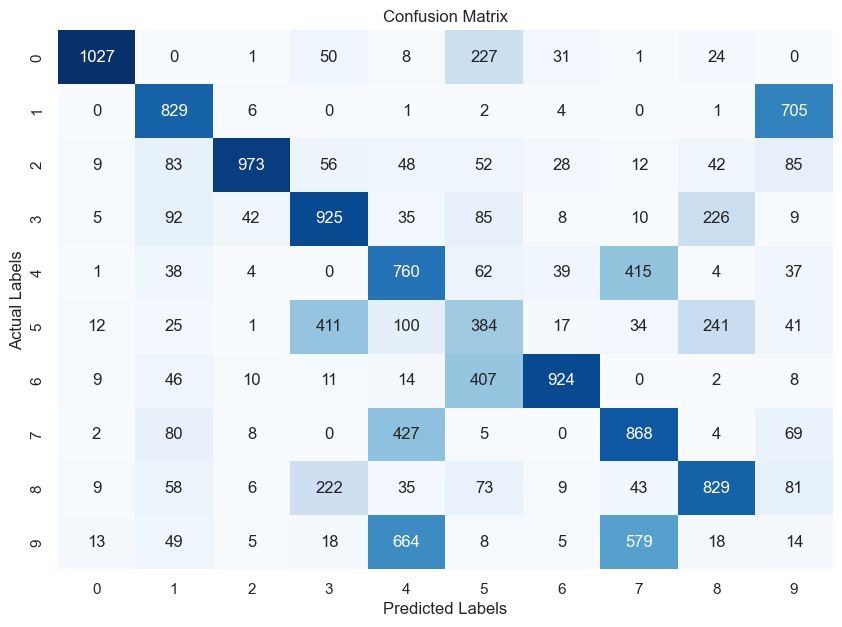

TestAccuray:  0.5380714285714285
***************************************************************************
 #########  KFold Step: 4   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0   222.0    27.0   525.0  4416.0    11.0    54.0   197.0    39.0     0.0   
1     9.0  2765.0     8.0     0.0     7.0     1.0     8.0     8.0  3510.0   
2   360.0   400.0   129.0    55.0    35.0   190.0   157.0  3931.0   293.0   
3  3642.0    68.0  1085.0    32.0   118.0    67.0    56.0   218.0   359.0   
4     0.0   191.0    11.0     4.0  1471.0  2076.0   114.0    21.0    95.0   
5  1634.0   622.0  1768.0    56.0   246.0   197.0   114.0    17.0   120.0   
6    25.0   187.0   152.0    67.0     3.0   244.0  4511.0   102.0   265.0   
7     4.0   226.0     1.0    10.0  2282.0   591.0     5.0    32.0   199.0   
8  1259.0   375.0  2880.0    32.0   179.0   119.0    55.0    45.0   244.0   
9    74.0    64.0    42.0    35.0  2316.0  1464.0     8.0    10.0   119.0  

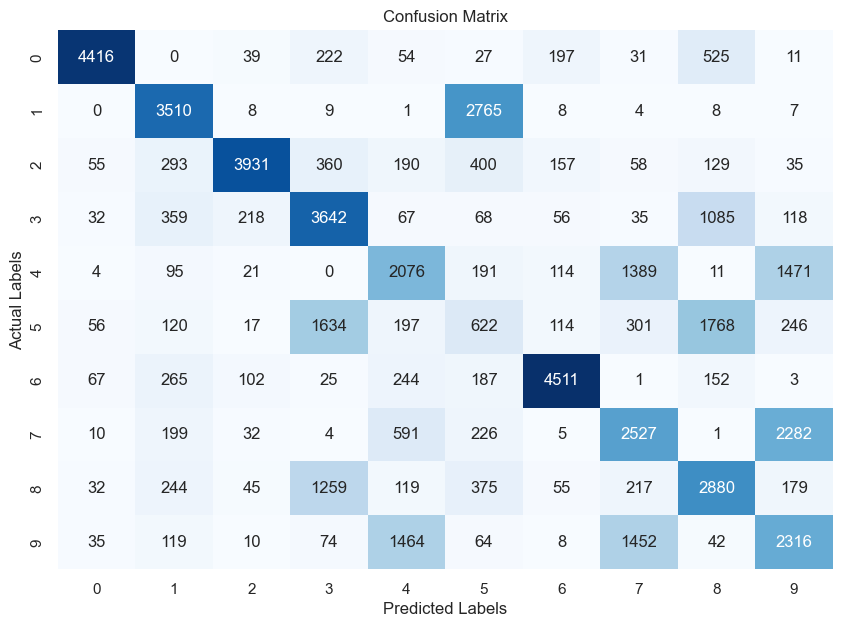

Training Accuray:  0.5434107142857143
***************************************************************************
Test Confusing Matrix


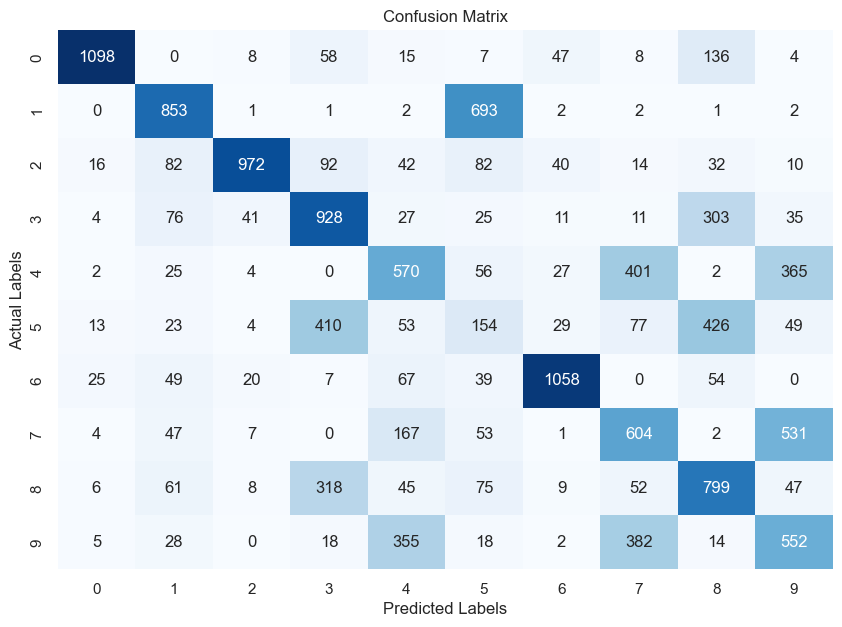

TestAccuray:  0.542
***************************************************************************
 #########  KFold Step: 5   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0     9.0   230.0     1.0  4023.0  1041.0    36.0     5.0     3.0   120.0   
1     9.0     7.0  3438.0     0.0     7.0     6.0     8.0  2777.0     7.0   
2  3859.0   259.0   364.0    44.0   199.0   171.0    61.0   335.0   124.0   
3   169.0  3661.0   382.0    16.0   352.0   154.0    37.0    48.0    28.0   
4    24.0     0.0   147.0     6.0   242.0  2959.0  1763.0   175.0   130.0   
5     5.0  1702.0   142.0    50.0  1441.0   336.0   183.0   243.0    49.0   
6    50.0    31.0   148.0    53.0  1657.0    59.0     3.0    37.0  3469.0   
7    41.0     2.0   323.0    17.0    11.0  1674.0  3520.0   259.0     3.0   
8    43.0   949.0   267.0    30.0   231.0   164.0   153.0   278.0    41.0   
9    15.0    63.0   215.0    42.0    24.0  2728.0  2319.0    77.0    14.0   

       C9 

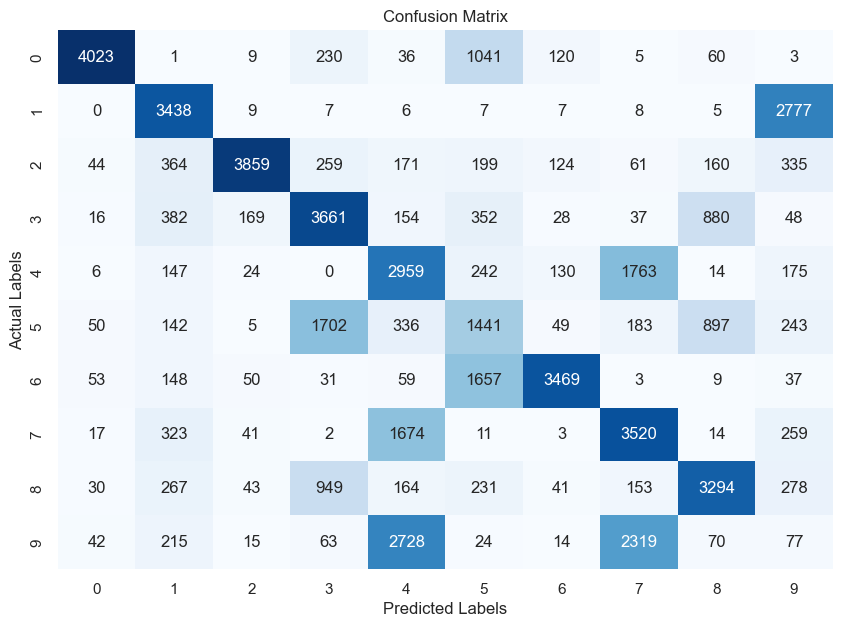

Training Accuray:  0.5310892857142857
***************************************************************************
Test Confusing Matrix


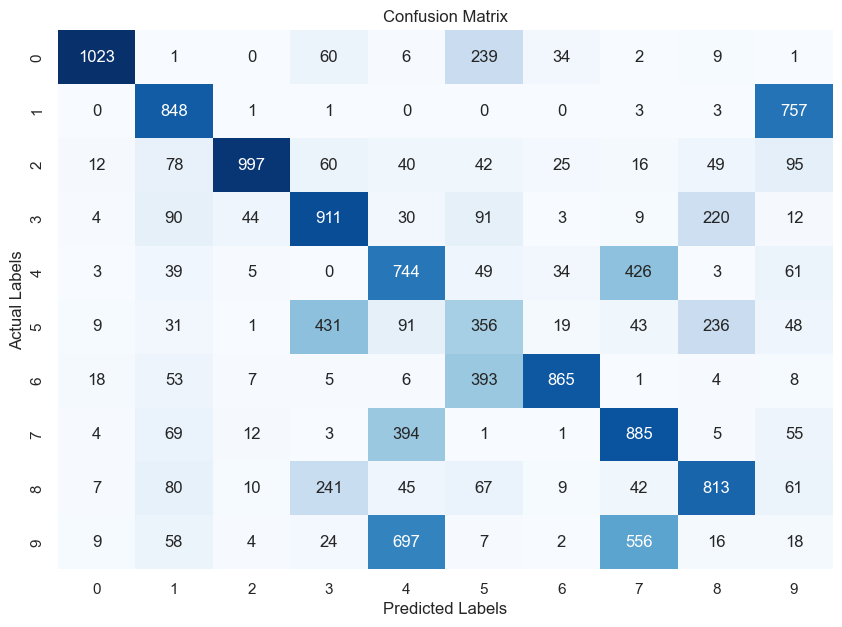

TestAccuray:  0.5328571428571428
***************************************************************************
Using Manhattan distance metric:
 #########  KFold Step: 1   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0     3.0     5.0  4002.0     2.0  1108.0   232.0   123.0     5.0    47.0   
1  2781.0     9.0     0.0  3455.0     5.0     4.0     7.0     6.0     6.0   
2   342.0  3931.0    47.0   349.0   182.0   243.0   106.0    62.0   174.0   
3    47.0   163.0    19.0   365.0   411.0  3630.0    25.0    38.0   869.0   
4   220.0    21.0     6.0   161.0   172.0     0.0   138.0  1804.0    14.0   
5   289.0     4.0    44.0   134.0  1403.0  1682.0    59.0   188.0   887.0   
6    39.0    41.0    56.0   174.0  1623.0    29.0  3454.0     3.0    12.0   
7   256.0    46.0    17.0   328.0     7.0     4.0     2.0  3477.0    20.0   
8   281.0    40.0    26.0   276.0   224.0   956.0    41.0   162.0  3299.0   
9    74.0    17.0    37.0   220.0    23.0 

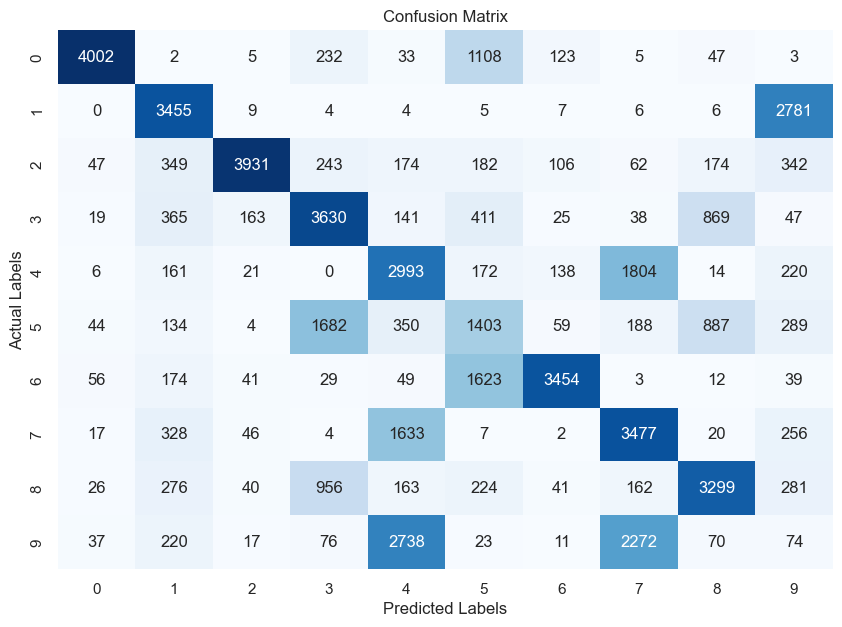

Training Accuray:  0.5306785714285714
***************************************************************************
Test Confusing Matrix


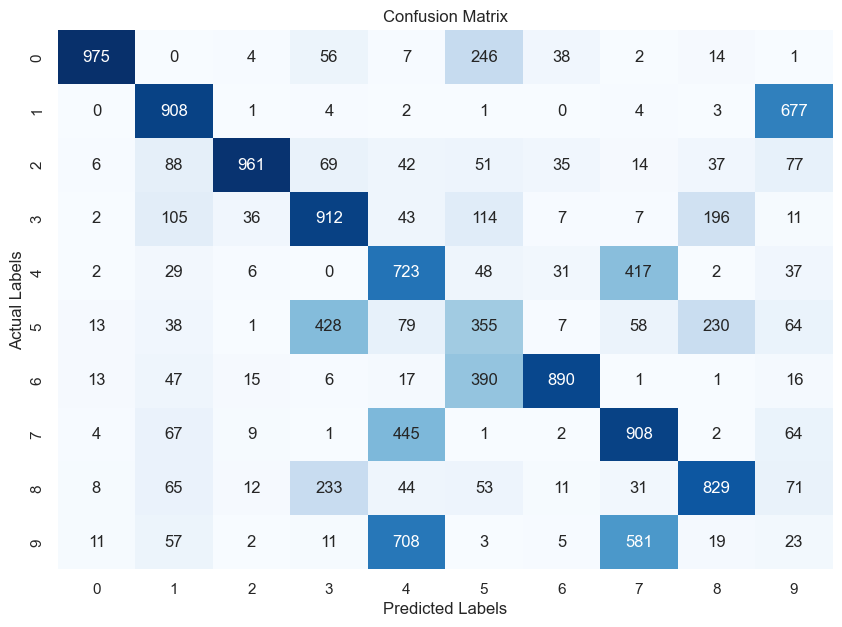

TestAccuray:  0.5345714285714286
***************************************************************************
 #########  KFold Step: 2   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0  4031.0     2.0     7.0   138.0    31.0   971.0   227.0     4.0    49.0   
1     0.0  3408.0     7.0     5.0     6.0     6.0     7.0  2863.0     6.0   
2    40.0   337.0  3887.0   116.0   176.0   180.0   263.0   334.0   169.0   
3    13.0   364.0   157.0    23.0   165.0   413.0  3752.0    41.0   784.0   
4     7.0   139.0    21.0   144.0  3022.0   212.0     0.0   179.0    15.0   
5    47.0   122.0     5.0    58.0   369.0  1498.0  1713.0   202.0   857.0   
6    59.0   163.0    42.0  3553.0    56.0  1549.0    32.0    35.0    13.0   
7    15.0   290.0    39.0     4.0  1687.0    10.0     6.0   244.0    13.0   
8    29.0   273.0    39.0    38.0   175.0   265.0   961.0   253.0  3338.0   
9    37.0   221.0    12.0    15.0  2759.0    26.0    78.0    75.0    67.0  

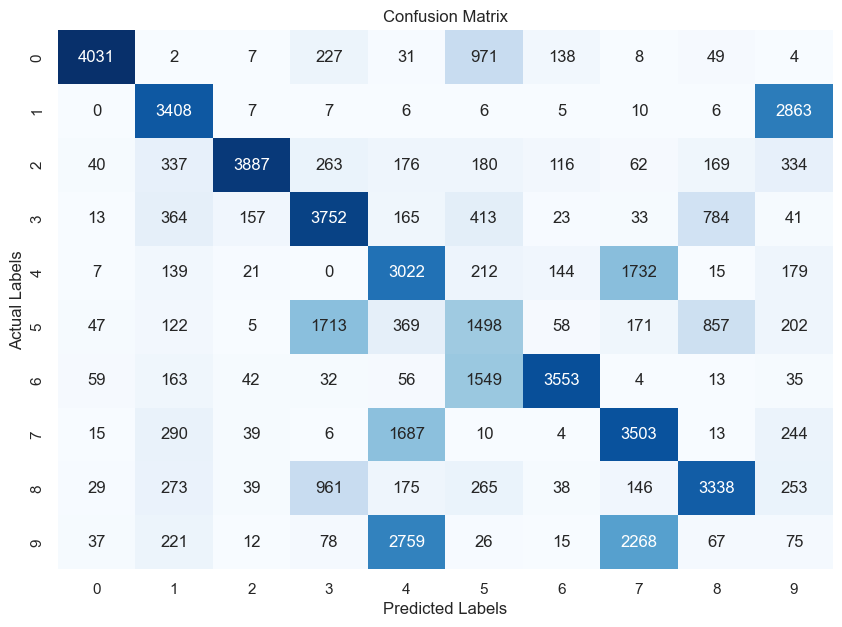

Training Accuray:  0.5369107142857142
***************************************************************************
Test Confusing Matrix


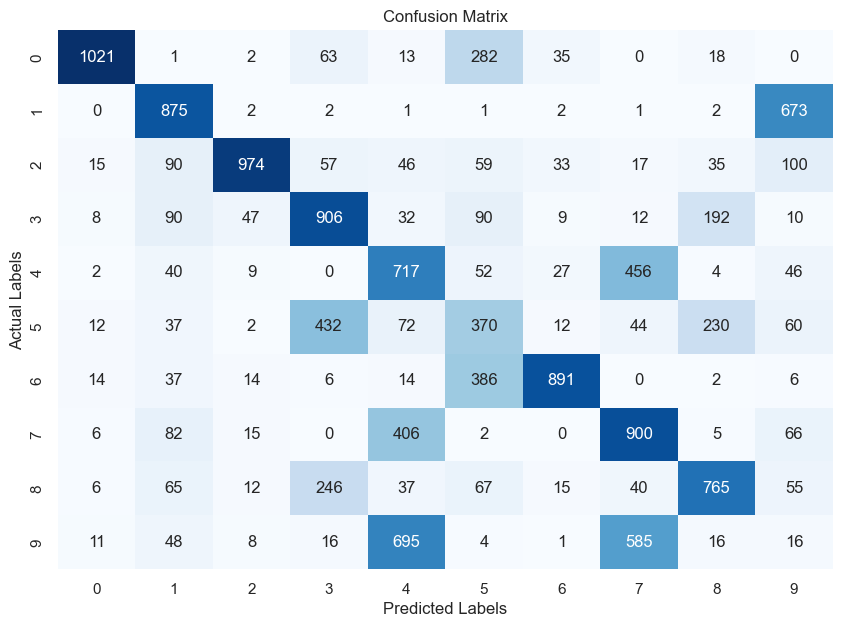

TestAccuray:  0.5310714285714285
***************************************************************************
 #########  KFold Step: 3   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0   141.0    81.0     1.0    29.0   989.0     3.0  4035.0     6.0     7.0   
1     2.0     8.0  3464.0     5.0     5.0  2820.0     0.0    11.0     5.0   
2   124.0   155.0   334.0   157.0   234.0   340.0    49.0    66.0  3897.0   
3    26.0   897.0   362.0   156.0   377.0    44.0    16.0    37.0   170.0   
4   131.0    11.0   140.0  2975.0   272.0   171.0     8.0  1732.0    24.0   
5    54.0   997.0   135.0   309.0  1474.0   165.0    46.0   171.0     5.0   
6  3525.0    19.0   159.0    52.0  1509.0    30.0    69.0     4.0    47.0   
7     4.0    14.0   268.0  1650.0    12.0   241.0    19.0  3571.0    46.0   
8    41.0  3262.0   278.0   170.0   326.0   214.0    28.0   149.0    46.0   
9    11.0    74.0   196.0  2782.0    30.0    76.0    39.0  2295.0    14.0  

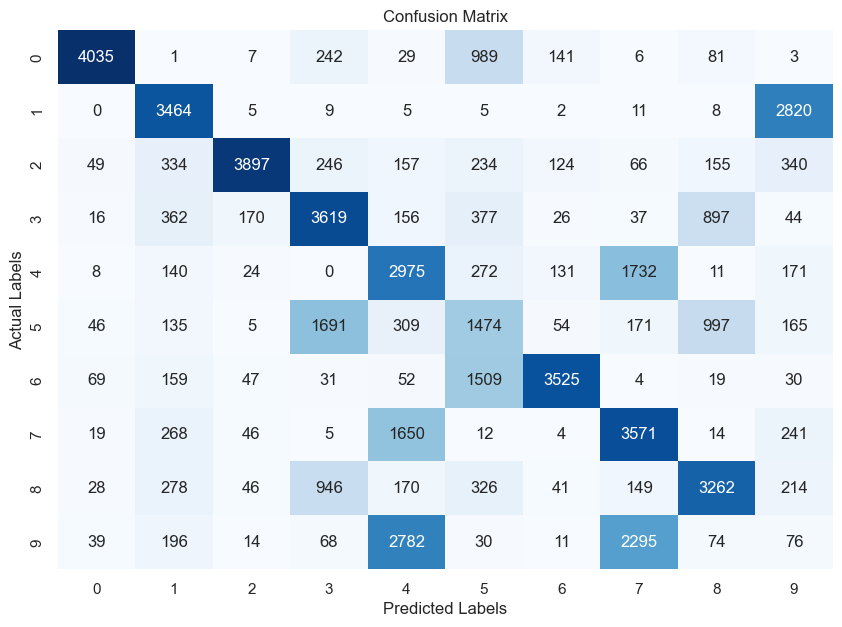

Training Accuray:  0.5338928571428572
***************************************************************************
Test Confusing Matrix


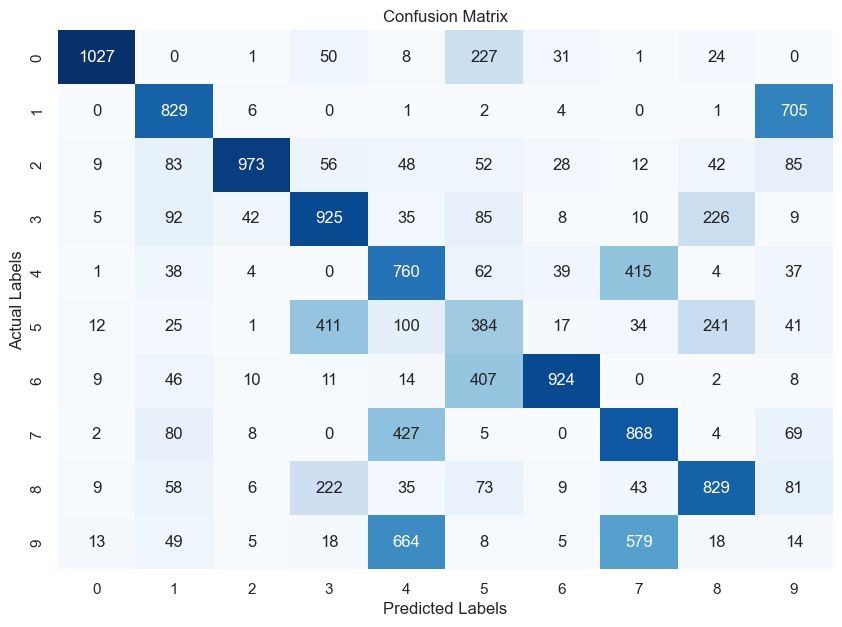

TestAccuray:  0.5380714285714285
***************************************************************************
 #########  KFold Step: 4   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0   222.0    27.0   525.0  4416.0    11.0    54.0   197.0    39.0     0.0   
1     9.0  2765.0     8.0     0.0     7.0     1.0     8.0     8.0  3510.0   
2   360.0   400.0   129.0    55.0    35.0   190.0   157.0  3931.0   293.0   
3  3642.0    68.0  1085.0    32.0   118.0    67.0    56.0   218.0   359.0   
4     0.0   191.0    11.0     4.0  1471.0  2076.0   114.0    21.0    95.0   
5  1634.0   622.0  1768.0    56.0   246.0   197.0   114.0    17.0   120.0   
6    25.0   187.0   152.0    67.0     3.0   244.0  4511.0   102.0   265.0   
7     4.0   226.0     1.0    10.0  2282.0   591.0     5.0    32.0   199.0   
8  1259.0   375.0  2880.0    32.0   179.0   119.0    55.0    45.0   244.0   
9    74.0    64.0    42.0    35.0  2316.0  1464.0     8.0    10.0   119.0  

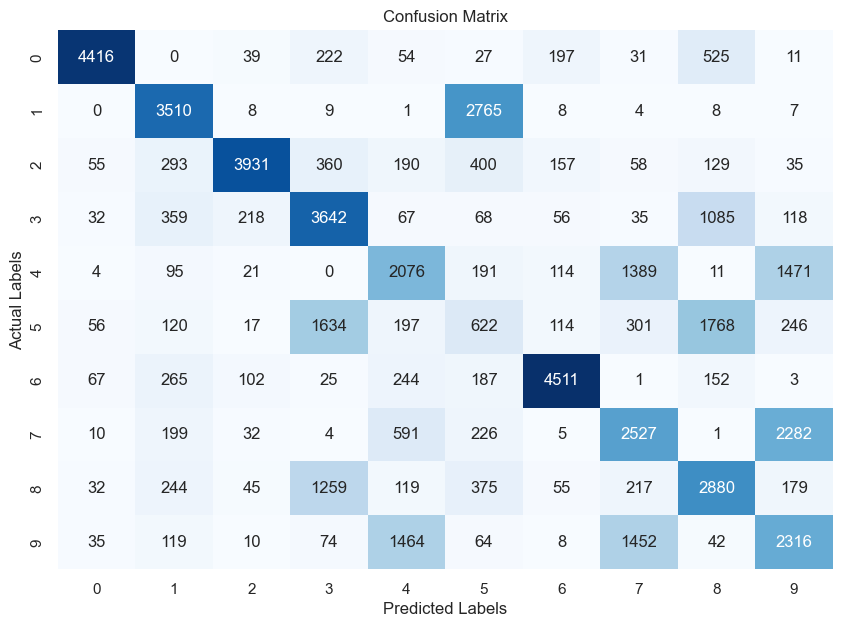

Training Accuray:  0.5434107142857143
***************************************************************************
Test Confusing Matrix


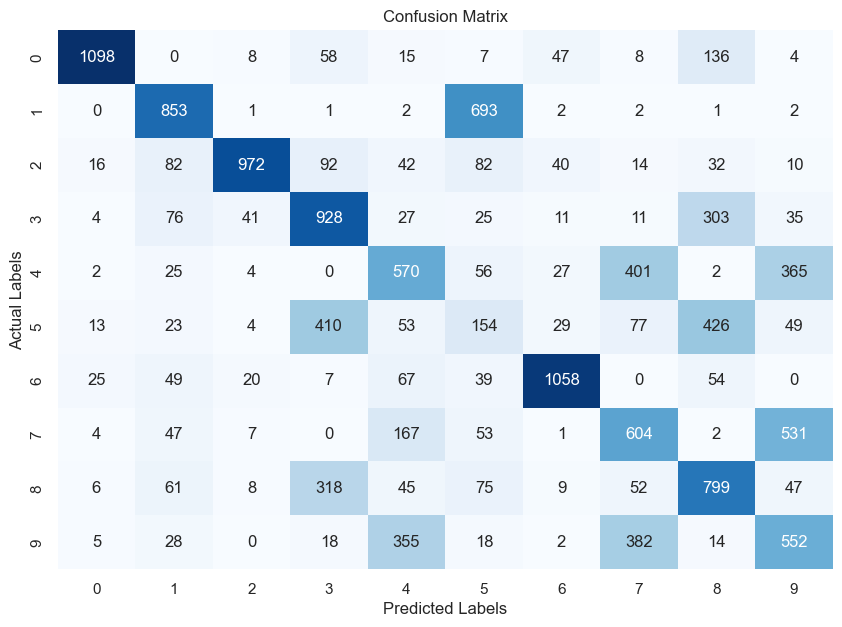

TestAccuray:  0.542
***************************************************************************
 #########  KFold Step: 5   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0     9.0   230.0     1.0  4023.0  1041.0    36.0     5.0     3.0   120.0   
1     9.0     7.0  3438.0     0.0     7.0     6.0     8.0  2777.0     7.0   
2  3859.0   259.0   364.0    44.0   199.0   171.0    61.0   335.0   124.0   
3   169.0  3661.0   382.0    16.0   352.0   154.0    37.0    48.0    28.0   
4    24.0     0.0   147.0     6.0   242.0  2959.0  1763.0   175.0   130.0   
5     5.0  1702.0   142.0    50.0  1441.0   336.0   183.0   243.0    49.0   
6    50.0    31.0   148.0    53.0  1657.0    59.0     3.0    37.0  3469.0   
7    41.0     2.0   323.0    17.0    11.0  1674.0  3520.0   259.0     3.0   
8    43.0   949.0   267.0    30.0   231.0   164.0   153.0   278.0    41.0   
9    15.0    63.0   215.0    42.0    24.0  2728.0  2319.0    77.0    14.0   

       C9 

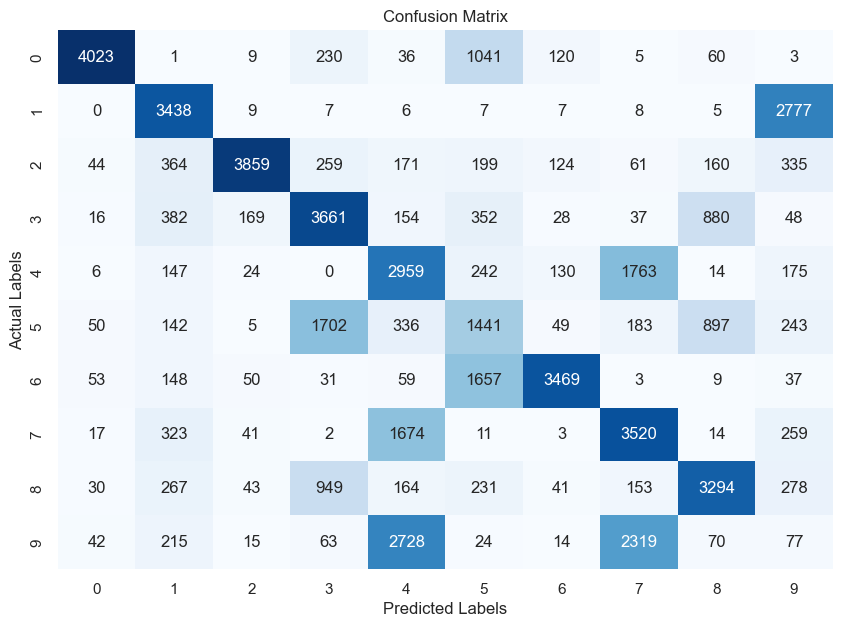

Training Accuray:  0.5310892857142857
***************************************************************************
Test Confusing Matrix


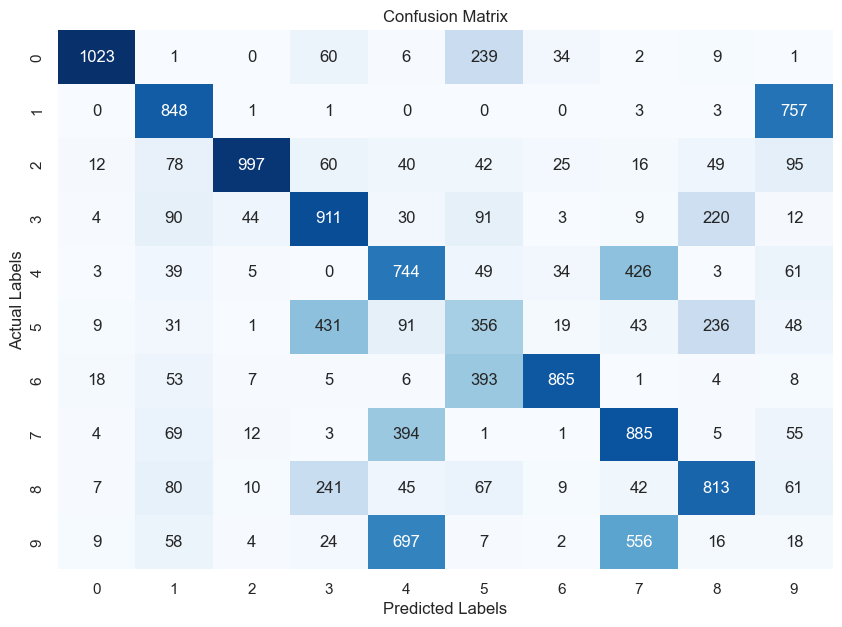

TestAccuray:  0.5328571428571428
***************************************************************************
Using Cosine distance metric:
 #########  KFold Step: 1   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0     3.0     5.0  4002.0     2.0  1108.0   232.0   123.0     5.0    47.0   
1  2781.0     9.0     0.0  3455.0     5.0     4.0     7.0     6.0     6.0   
2   342.0  3931.0    47.0   349.0   182.0   243.0   106.0    62.0   174.0   
3    47.0   163.0    19.0   365.0   411.0  3630.0    25.0    38.0   869.0   
4   220.0    21.0     6.0   161.0   172.0     0.0   138.0  1804.0    14.0   
5   289.0     4.0    44.0   134.0  1403.0  1682.0    59.0   188.0   887.0   
6    39.0    41.0    56.0   174.0  1623.0    29.0  3454.0     3.0    12.0   
7   256.0    46.0    17.0   328.0     7.0     4.0     2.0  3477.0    20.0   
8   281.0    40.0    26.0   276.0   224.0   956.0    41.0   162.0  3299.0   
9    74.0    17.0    37.0   220.0    23.0    

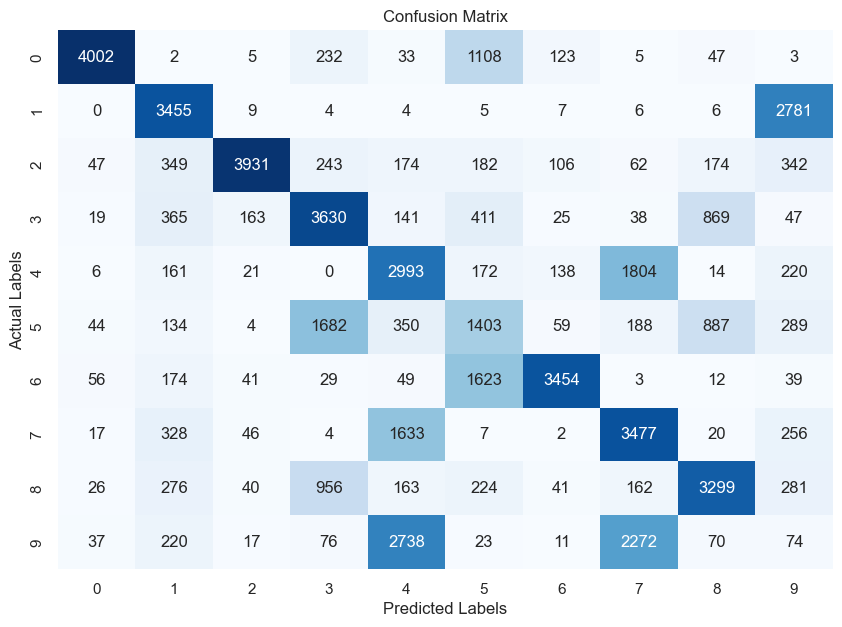

Training Accuray:  0.5306785714285714
***************************************************************************
Test Confusing Matrix


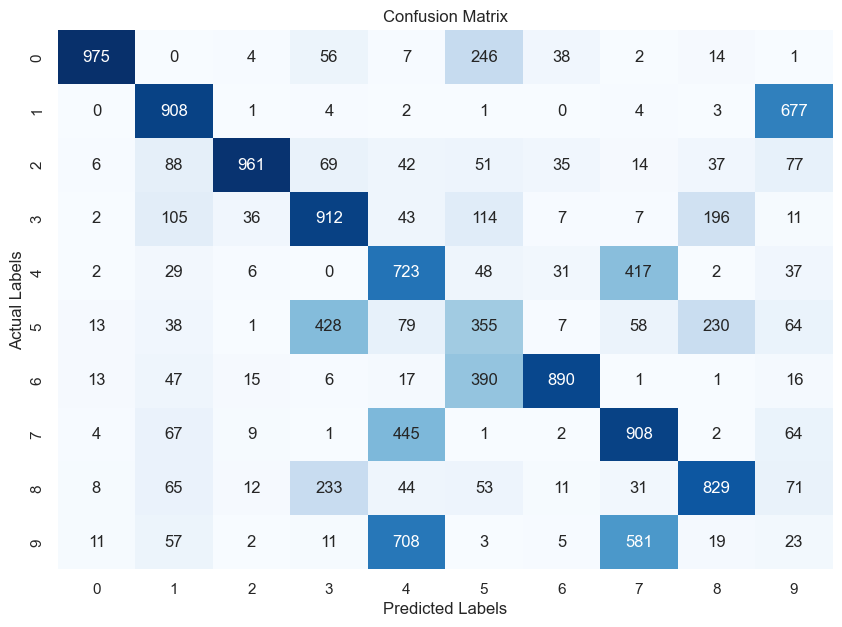

TestAccuray:  0.5345714285714286
***************************************************************************
 #########  KFold Step: 2   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0  4031.0     2.0     7.0   138.0    31.0   971.0   227.0     4.0    49.0   
1     0.0  3408.0     7.0     5.0     6.0     6.0     7.0  2863.0     6.0   
2    40.0   337.0  3887.0   116.0   176.0   180.0   263.0   334.0   169.0   
3    13.0   364.0   157.0    23.0   165.0   413.0  3752.0    41.0   784.0   
4     7.0   139.0    21.0   144.0  3022.0   212.0     0.0   179.0    15.0   
5    47.0   122.0     5.0    58.0   369.0  1498.0  1713.0   202.0   857.0   
6    59.0   163.0    42.0  3553.0    56.0  1549.0    32.0    35.0    13.0   
7    15.0   290.0    39.0     4.0  1687.0    10.0     6.0   244.0    13.0   
8    29.0   273.0    39.0    38.0   175.0   265.0   961.0   253.0  3338.0   
9    37.0   221.0    12.0    15.0  2759.0    26.0    78.0    75.0    67.0  

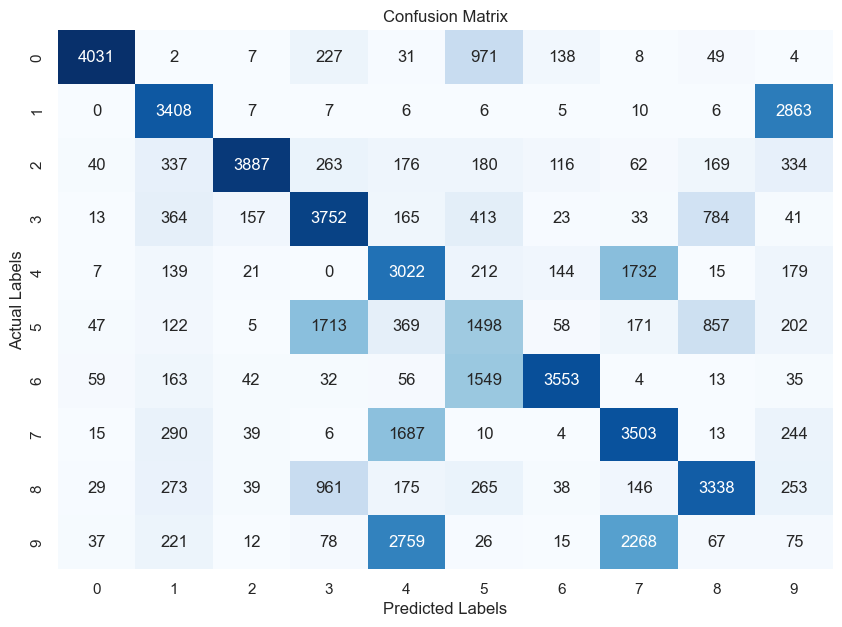

Training Accuray:  0.5369107142857142
***************************************************************************
Test Confusing Matrix


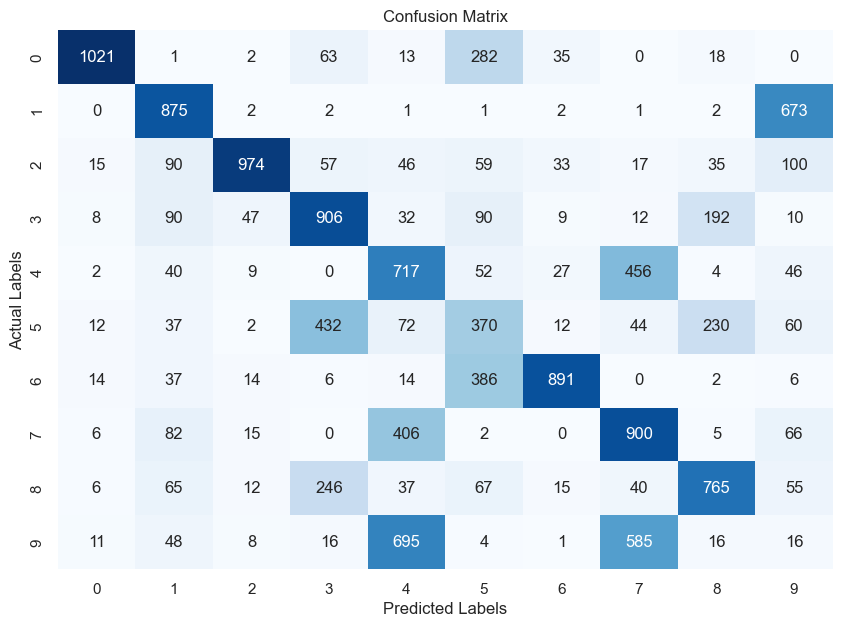

TestAccuray:  0.5310714285714285
***************************************************************************
 #########  KFold Step: 3   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0   141.0    81.0     1.0    29.0   989.0     3.0  4035.0     6.0     7.0   
1     2.0     8.0  3464.0     5.0     5.0  2820.0     0.0    11.0     5.0   
2   124.0   155.0   334.0   157.0   234.0   340.0    49.0    66.0  3897.0   
3    26.0   897.0   362.0   156.0   377.0    44.0    16.0    37.0   170.0   
4   131.0    11.0   140.0  2975.0   272.0   171.0     8.0  1732.0    24.0   
5    54.0   997.0   135.0   309.0  1474.0   165.0    46.0   171.0     5.0   
6  3525.0    19.0   159.0    52.0  1509.0    30.0    69.0     4.0    47.0   
7     4.0    14.0   268.0  1650.0    12.0   241.0    19.0  3571.0    46.0   
8    41.0  3262.0   278.0   170.0   326.0   214.0    28.0   149.0    46.0   
9    11.0    74.0   196.0  2782.0    30.0    76.0    39.0  2295.0    14.0  

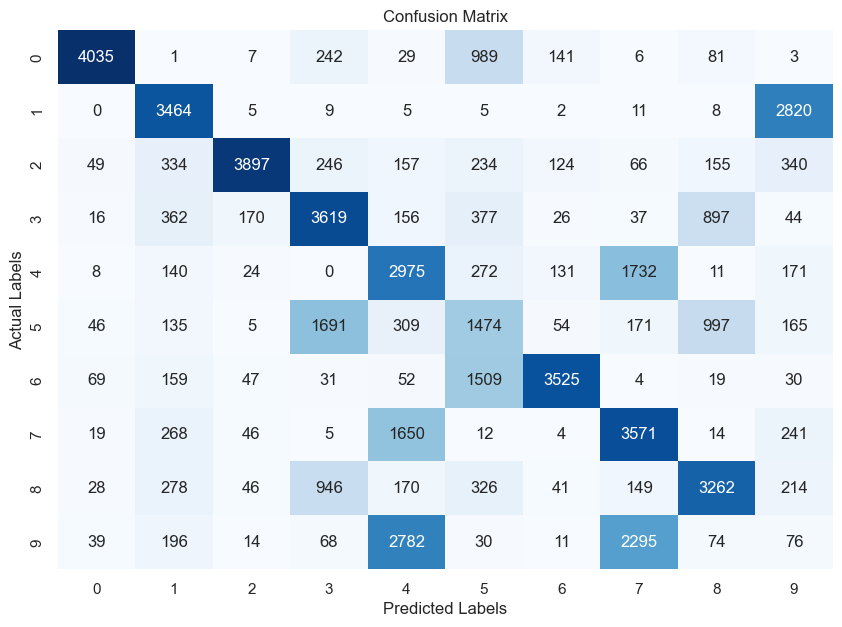

Training Accuray:  0.5338928571428572
***************************************************************************
Test Confusing Matrix


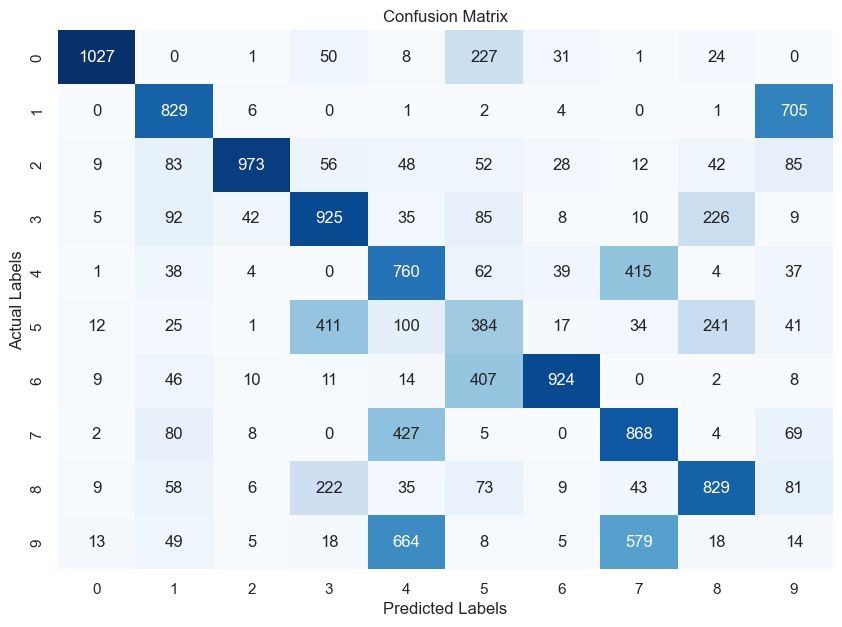

TestAccuray:  0.5380714285714285
***************************************************************************
 #########  KFold Step: 4   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0   222.0    27.0   525.0  4416.0    11.0    54.0   197.0    39.0     0.0   
1     9.0  2765.0     8.0     0.0     7.0     1.0     8.0     8.0  3510.0   
2   360.0   400.0   129.0    55.0    35.0   190.0   157.0  3931.0   293.0   
3  3642.0    68.0  1085.0    32.0   118.0    67.0    56.0   218.0   359.0   
4     0.0   191.0    11.0     4.0  1471.0  2076.0   114.0    21.0    95.0   
5  1634.0   622.0  1768.0    56.0   246.0   197.0   114.0    17.0   120.0   
6    25.0   187.0   152.0    67.0     3.0   244.0  4511.0   102.0   265.0   
7     4.0   226.0     1.0    10.0  2282.0   591.0     5.0    32.0   199.0   
8  1259.0   375.0  2880.0    32.0   179.0   119.0    55.0    45.0   244.0   
9    74.0    64.0    42.0    35.0  2316.0  1464.0     8.0    10.0   119.0  

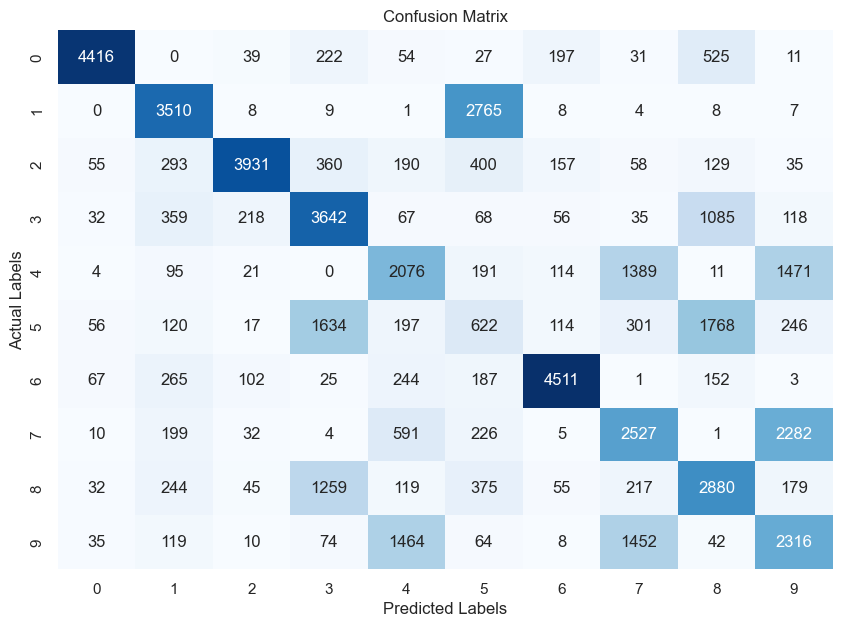

Training Accuray:  0.5434107142857143
***************************************************************************
Test Confusing Matrix


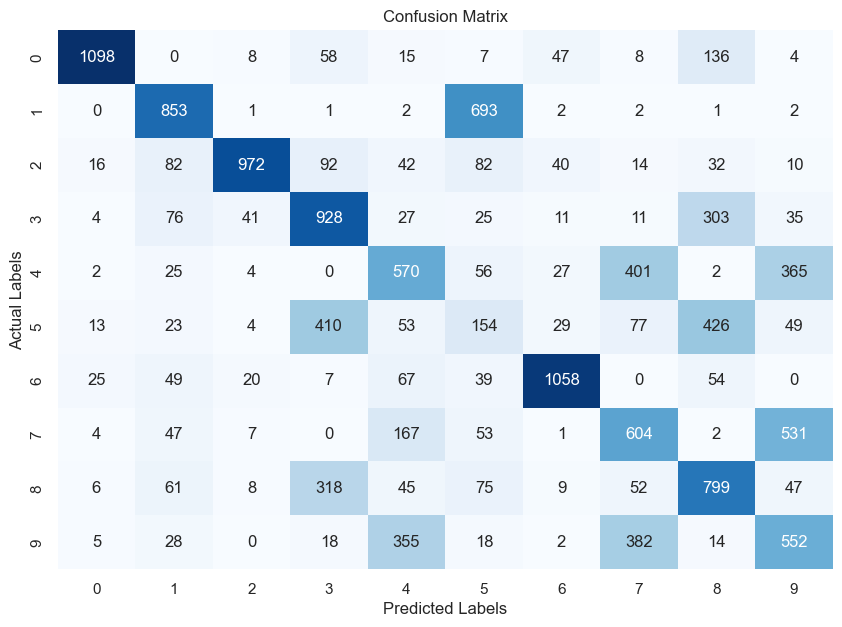

TestAccuray:  0.542
***************************************************************************
 #########  KFold Step: 5   #########
Table:
        C0      C1      C2      C3      C4      C5      C6      C7      C8  \
0     9.0   230.0     1.0  4023.0  1041.0    36.0     5.0     3.0   120.0   
1     9.0     7.0  3438.0     0.0     7.0     6.0     8.0  2777.0     7.0   
2  3859.0   259.0   364.0    44.0   199.0   171.0    61.0   335.0   124.0   
3   169.0  3661.0   382.0    16.0   352.0   154.0    37.0    48.0    28.0   
4    24.0     0.0   147.0     6.0   242.0  2959.0  1763.0   175.0   130.0   
5     5.0  1702.0   142.0    50.0  1441.0   336.0   183.0   243.0    49.0   
6    50.0    31.0   148.0    53.0  1657.0    59.0     3.0    37.0  3469.0   
7    41.0     2.0   323.0    17.0    11.0  1674.0  3520.0   259.0     3.0   
8    43.0   949.0   267.0    30.0   231.0   164.0   153.0   278.0    41.0   
9    15.0    63.0   215.0    42.0    24.0  2728.0  2319.0    77.0    14.0   

       C9 

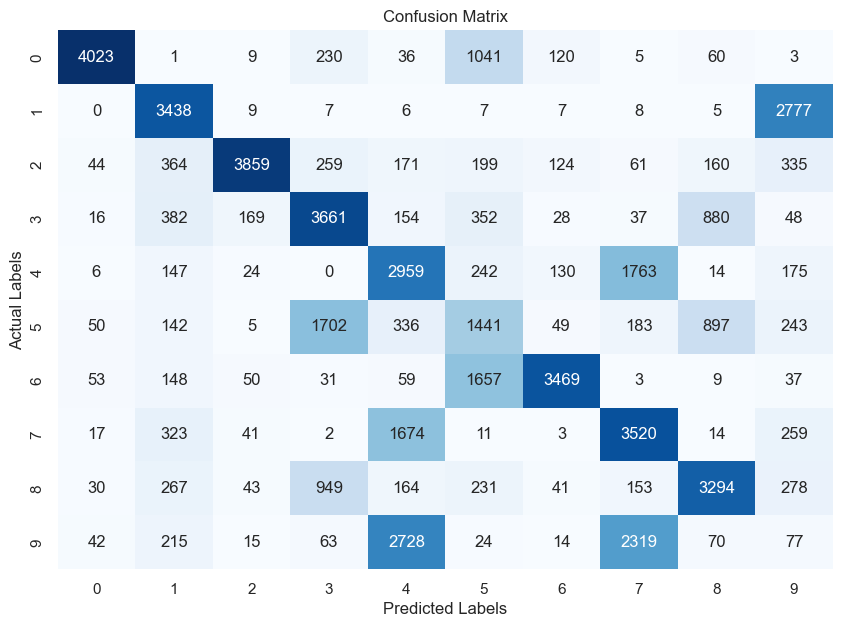

Training Accuray:  0.5310892857142857
***************************************************************************
Test Confusing Matrix


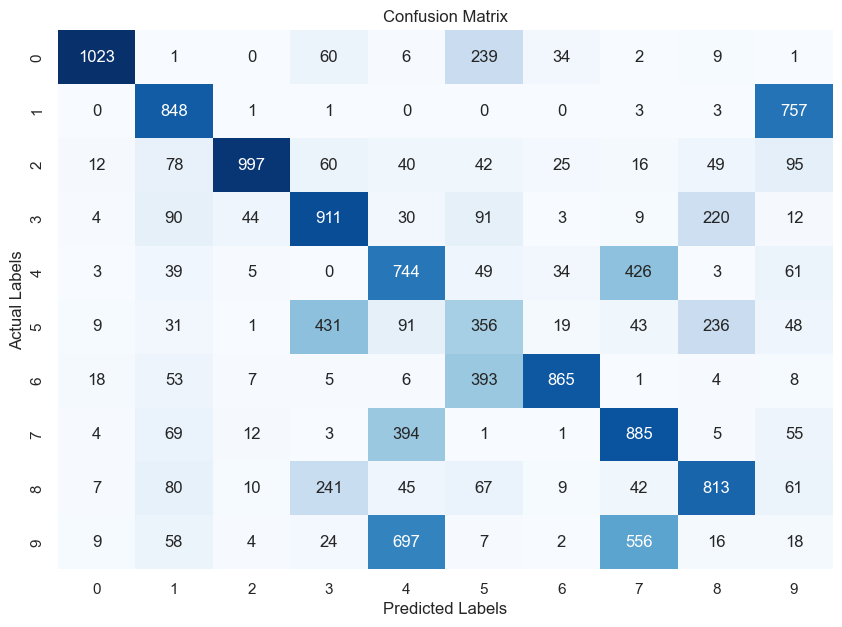

TestAccuray:  0.5328571428571428
***************************************************************************


In [22]:
kmeans_algorithms = [
    ('Euclidean', 'euclidean'),
    ('Manhattan', 'manhattan'),
    ('Cosine', 'cosine')
]
folds = KFold(n_splits=5,shuffle=True,random_state=42)
k=10 #number of cluster

for name, metric in kmeans_algorithms:
    print(f"Using {name} distance metric:")
    accuracies = []
    kFoldIndex = 1
    for train_index, val_index in folds.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]
        kmeans = kmeans_clustering(X_train_fold,distance_metric=metric,n_clusters=k)
        cluster_label = kmeans.labels_
        table = np.zeros((10,10))
        print(' #########  KFold Step:', kFoldIndex,'  #########')
        for l,c in zip(y_train_fold, cluster_label):
            table[l][c] = table[l][c] + 1

        df = pd.DataFrame(data=table, columns = ['C'+str(i) for i in range(k)])
        print('Table:\n',df,'\n')

        flattenTable = table.flatten()
        flattenTable[::-1].sort()

        orders = []
        for d in flattenTable:
            ind = np.where(table==d)
            for j in zip(*ind):
                orders.append(j)

        # label clusters according to explanation which exist in hw pdf
        labelsRow = {}
        labelsCol = {}
        i = 0
        while True:
            row = orders[i][0]
            col = orders[i][1]

            if (not row in labelsRow) and (not col in labelsCol):
                labelsRow[row] = (row,col, table[row][col])
                labelsCol[col] = (row,col, table[row][col])

            if len(labelsRow) == k:
                break

            i = i + 1

        clusterLabels = {}
        for i in range(k):
            clusterLabels[labelsRow[i][1]] = labelsRow[i][0]
            print('Cluster:',labelsRow[i][1],' assigned Label:',labelsRow[i][0], ' Value:', labelsRow[i][2])
        print('\n')
        kFoldIndex += 1

        test_predict = []
        train_predict = []
        val_clusters = kmeans.predict(X_val_fold)
        val_pred = [clusterLabels[cluster] for cluster in val_clusters]
        for train in cluster_label:
            train_predict.append(clusterLabels[train])

        print("Trainin Confusing Matrix")
        cm = confusion_matrix(y_train_fold,train_predict)
        sns.set(font_scale=1)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted Labels')
        plt.ylabel('Actual Labels')
        plt.title('Confusion Matrix')
        plt.show()
        print("Training Accuray: ",accuracy_score(y_train_fold,train_predict))

        print("***************************************************************************")
        print("Test Confusing Matrix")
        cm = confusion_matrix(y_val_fold,val_pred)

        sns.set(font_scale=1)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted Labels')
        plt.ylabel('Actual Labels')
        plt.title('Confusion Matrix')
        plt.show()
        print("TestAccuray: ",accuracy_score(y_val_fold,val_pred)),
        print("***************************************************************************")

# Conclusion

In conclusion, we implemented the k-means clustering algorithm with support for different distance metrics, including Euclidean, Manhattan, and Cosine distances. We achieved this by subclassing the `KMeans` estimator from Scikit-learn and overriding the `_transform` method to compute distances based on the specified metric.

- For Euclidean distance, we utilized the default behavior of the `_transform` method provided by the `KMeans` class.
- For Manhattan and Cosine distances, we implemented custom distance calculations within the `_transform` method, ensuring compatibility with the KMeans algorithm.

This approach allows us to use k-means clustering with various distance metrics to suit different data types and characteristics. By incorporating custom distance metrics, we can better capture the relationships between data points and improve clustering performance in scenarios where Euclidean distance may not be the most appropriate measure of similarity. Overall, implementing k-means with different distance metrics enhances its versatility and applicability to a wide range of clustering tasks.